In [3]:
def meter_ke_index(x_m, start_idx, sampling_interval, v_mps):
    # x_m: jarak dari kepala kereta (meter)
    # v_mps: kecepatan meter per second
    t = x_m / v_mps
    return start_idx + round(t / sampling_interval)

def index_ke_meter(idx, start_idx, sampling_interval, v_mps):
    t = (idx - start_idx) * sampling_interval
    return v_mps * t

start indeks kereta:  17
Sampling interval (detik): 0.005
end indeks kereta setelah 1016
1016
17
Perkiraan kecepatan kereta: 24.02 m/s (86.49 km/h)
1
Bearing ke 1 index ke-37: 16.0
Bearing ke 2 index ke-54: 8.0
Bearing ke 3 index ke-152: 15.0
Bearing ke 4 index ke-169: 16.0
2
Bearing ke 5 index ke-200: 17.0
Bearing ke 6 index ke-217: 19.0
Bearing ke 7 index ke-315: 24.0
Bearing ke 8 index ke-332: 17.0
3
Bearing ke 9 index ke-365: 11.0
Bearing ke 10 index ke-382: 14.0
Bearing ke 11 index ke-480: 12.0
Bearing ke 12 index ke-497: 12.0
4
Bearing ke 13 index ke-529: 19.0
Bearing ke 14 index ke-546: 17.0
Bearing ke 15 index ke-644: 21.0
Bearing ke 16 index ke-661: 16.0
5
Bearing ke 17 index ke-693: 24.0
Bearing ke 18 index ke-710: 22.0
Bearing ke 19 index ke-808: 19.0
Bearing ke 20 index ke-825: 20.0
6
Bearing ke 21 index ke-858: 17.0
Bearing ke 22 index ke-875: 18.0
Bearing ke 23 index ke-973: 17.0
Bearing ke 24 index ke-990: 17.0


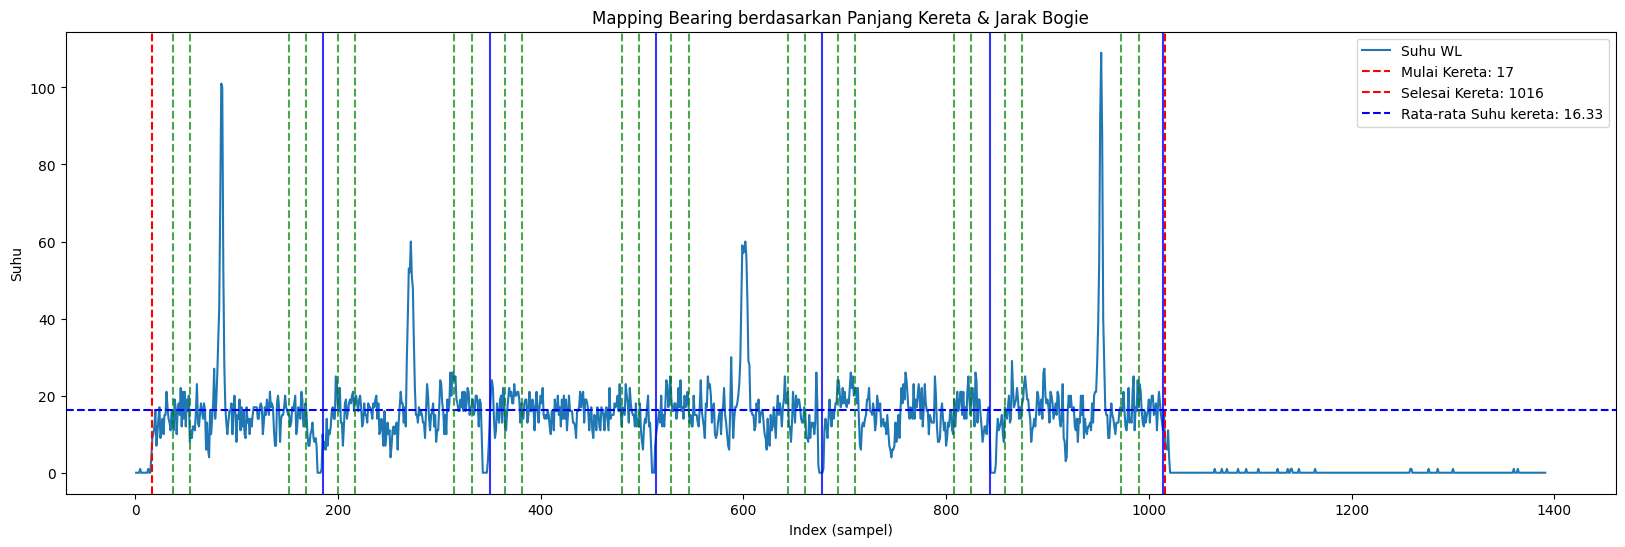

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_bearing_mapping(csv_file,
     panjang_gerbong, jarak_bogie, jarak_axle
):
    """
    suhu              : array suhu (1 kolom sensor, misalnya WL)
    start_kereta      : index mulai kereta
    stop_kereta       : index selesai kereta
    sampling_interval : interval sampling (detik)
    kecepatan         : kecepatan kereta (m/s)
    panjang_gerbong   : panjang 1 gerbong (m)
    jarak_bogie       : jarak antar bogie dalam 1 gerbong (m)
    jarak_axle        : jarak antar axle dalam 1 bogie (m)
    """
    
    # csv_file = "hotbox-data-20250717/mrt-minipc-001/mrt-minipc-001/temperature/log000_241105060417.csv"
    column_names = ["id","tanggal","waktu","WL","BL","BR","WR",
                        "col5","col6","col7","col8","col9","ms"]
    df = pd.read_csv(csv_file, header=None, names=column_names)
    # --- Cari awal kereta ---
    sensor_col = "BL"
    suhu_all = df[sensor_col]
    mean_suhu = suhu_all.mean()

    try:
        start_kereta = (suhu_all[suhu_all > mean_suhu - 5].index[0])
        print("start indeks kereta: ",start_kereta)
    except IndexError:
        print("Tidak ada kereta terdeteksi.")
    # buat timestamp dari waktu + ms
    df["timestamp"] = pd.to_datetime(df["tanggal"] + " " + df["waktu"], format="%Y/%m/%d %H:%M:%S") \
                    + pd.to_timedelta(df["ms"], unit="ms")

    # hitung sampling interval (detik)
    dt = df["timestamp"].diff().dt.total_seconds()
    sampling_interval = dt.median()
    print("Sampling interval (detik):", sampling_interval)


    # --- Cari akhir kereta ---
    cutoff = mean_suhu
    suhu = suhu_all
    stop_kereta = len(suhu_all)
    
    below_counter = 0
    min_below_count = 50
    for i in range(start_kereta, len(suhu_all)):
        if suhu_all[i] < cutoff:
            below_counter += 1
            if below_counter >= min_below_count:
                stop_kereta = i - min_below_count + 1
                break
        else:
            below_counter = 0
    # stop_kereta = stop_kereta + 5
    print("end indeks kereta setelah",stop_kereta)
    
    # panjang kereta (meter)
    L = 120  

    # durasi lewat sensor (detik)
    print(stop_kereta)
    print(start_kereta)
    durasi = (stop_kereta - start_kereta) * sampling_interval

    # kecepatan (m/s)
    v = L / durasi
    print(f"Perkiraan kecepatan kereta: {v:.2f} m/s ({v*3.6:.2f} km/h)")




    # --- Plot ---
    plt.figure(figsize=(20,6))
    plt.plot(suhu, label="Suhu WL")

    # garis start/stop kereta
    plt.axvline(start_kereta, color='r', linestyle='--', label=f"Mulai Kereta: {start_kereta}")
    plt.axvline(stop_kereta, color='r', linestyle='--', label=f"Selesai Kereta: {stop_kereta}")

    # rata-rata suhu
    mean_temp = np.mean(suhu[start_kereta:stop_kereta])
    plt.axhline(mean_temp, color='b', linestyle='--', label=f"Rata-rata Suhu kereta: {mean_temp:.2f}")
    
            
    gerbong1 = meter_ke_index(20.2, start_kereta, sampling_interval, v)
    gerbong2 = meter_ke_index(20.2+19.75, start_kereta, sampling_interval, v)
    gerbong3 = meter_ke_index(20.2+19.75+19.75, start_kereta, sampling_interval, v)
    gerbong4 = meter_ke_index(20.2+19.75+19.75+19.75, start_kereta, sampling_interval, v)
    gerbong5 = meter_ke_index(20.2+19.75+19.75+19.75+19.75, start_kereta, sampling_interval, v)
    gerbong6 = meter_ke_index(20.2+19.75+19.75+19.75+19.75+20.5, start_kereta, sampling_interval, v)
    
    plt.axvline(gerbong1, color='b', linestyle='-', alpha=0.8)
    plt.axvline(gerbong2, color='b', linestyle='-', alpha=0.8)
    plt.axvline(gerbong3, color='b', linestyle='-', alpha=0.8)
    plt.axvline(gerbong4, color='b', linestyle='-', alpha=0.8)
    plt.axvline(gerbong5, color='b', linestyle='-', alpha=0.8)
    plt.axvline(gerbong6, color='b', linestyle='-', alpha=0.8)
    
    def axle_positions_from_gerbong(start_index_gerbong, sampling_interval, v, start_kereta, gerbong_ke,bearing_ke):
        """
        Hitung posisi axle (index sample) untuk 1 gerbong
        """
        print(gerbong_ke)
        if gerbong_ke == 1:
            # Axle 1 = 2.375 m
            # Axle 2 = 2.375 + 2.1 = 4.475 m
            # Axle 3 = 2.375 + 13.8 = 16.175 m
            # Axle 4 = 16.175 + 2.1 = 18.275 m
            rel_pos = [2.375, 4.475, 16.175, 18.275]  # m
        else:
            # Axle 1 = 1.8 m
            # Axle 2 = 1.8 + 2.1 = 3.9 m
            # Axle 3 = 1.8 + 13.8 = 15.6 m
            # Axle 4 = 15.6 + 2.1 = 17.7 m
            rel_pos = [1.8, 3.9, 15.6, 17.7]  # m

        axle_idx = []
       
        for x_m in rel_pos:
            idx = meter_ke_index(x_m, start_index_gerbong, sampling_interval, v)
            axle_idx.append(idx)
            print(f"Bearing ke {bearing_ke} index ke-{idx}:", df['BL'].iloc[idx])
            bearing_ke+=1
        return axle_idx, bearing_ke

    
    
    # posisi gerbong (sudah Anda buat manual)
    gerbong_indices = {
        1: start_kereta,
        2: gerbong1,
        3: gerbong2,
        4: gerbong3,
        5: gerbong4,
        6: gerbong5,
    }

    # hitung axle untuk semua gerbong
    bearing_ke = 1
    all_axle_idx = []
    for g in range(1, 7):
        axle_idx,bearing_ke = axle_positions_from_gerbong(
            gerbong_indices[g], sampling_interval, v, start_kereta, g, bearing_ke
        )
        # print(f"gerbong ke {g} indeks ke{axle_idx}: {df['BL'].iloc[axle_idx]}")
        all_axle_idx.extend(axle_idx)

    # plot axle
    for i, idx in enumerate(all_axle_idx, start=1):
        plt.axvline(idx, color='g', linestyle='--', alpha=0.7)
        plt.text(idx, max(suhu)*0.9, f"A{i}", rotation=90, fontsize=7, color="g")


    # def roda_positions_from_gerbong(start_index_gerbong, sampling_interval, v, start_kereta, gerbong_ke):
    #     """
    #     Hitung posisi roda (index sample) untuk 1 gerbong.
    #     start_index_gerbong = indeks awal gerbong (dari garis gerbongN)
    #     """
    #     if gerbong_ke == 1:
    #         rel_pos = [1.955, 1.955+2.1, 1.955+13.8, 1.955+13.8+2.1]  # m
    #     else:
    #         rel_pos = [1.38, 1.38+2.1, 1.38+13.8, 1.38+13.8+2.1]  # m
        
    #     roda_idx = []
    #     for x_m in rel_pos:
    #         # konversi posisi roda ke index
    #         center_idx = meter_ke_index(x_m, start_index_gerbong, sampling_interval, v)
    #         # rentang blok sesuai diameter roda
    #         radius_m = 0.84 / 2
    #         left_idx  = meter_ke_index(x_m - radius_m, start_index_gerbong, sampling_interval, v)
    #         right_idx = meter_ke_index(x_m + radius_m, start_index_gerbong, sampling_interval, v)
    #         roda_idx.append((left_idx, right_idx))
    #     return roda_idx
    
    # # hitung roda semua gerbong
    # all_roda_idx = []
    # for g in range(1, 7):
    #     roda_idx = roda_positions_from_gerbong(
    #         gerbong_indices[g], sampling_interval, v, start_kereta, g
    #     )
    #     all_roda_idx.extend(roda_idx)

    # # plot blok roda
    # for i, (l, r) in enumerate(all_roda_idx, start=1):
    #     plt.axvspan(l, r, color='orange', alpha=0.3)
    #     plt.text((l+r)//2, max(suhu)*0.8, f"R{i}", rotation=90, fontsize=7, color="brown")
        
    
    def roda_positions_from_gerbong(start_index_gerbong, sampling_interval, v, gerbong_ke):
        """
        Hitung posisi roda (index sample) untuk 1 gerbong.
        start_index_gerbong = indeks awal gerbong (dari garis gerbongN)
        """
        # posisi awal roda dalam meter dari depan gerbong
        if gerbong_ke == 1:
            rel_pos = [1.955, 1.955+2.1, 1.955+13.8, 1.955+13.8+2.1]  # m
        else:
            rel_pos = [1.38, 1.38+2.1, 1.38+13.8, 1.38+13.8+2.1]  # m
        
        roda_idx = []
        for x_m in rel_pos:
            start_idx = meter_ke_index(x_m, start_index_gerbong, sampling_interval, v)
            end_idx   = meter_ke_index(x_m + 0.84, start_index_gerbong, sampling_interval, v)
            roda_idx.append((start_idx, end_idx))
        return roda_idx
    
    
    # hitung roda semua gerbong
    all_roda_idx = []
    for g in range(1, 7):
        roda_idx = roda_positions_from_gerbong(
            gerbong_indices[g], sampling_interval, v, g
        )
        all_roda_idx.extend(roda_idx)

    # plot blok roda
    # for i, (l, r) in enumerate(all_roda_idx, start=1):
    #     plt.axvspan(l, r, color='orange', alpha=0.3)
    #     plt.text((l+r)//2, max(suhu)*0.8, f"R{i}", rotation=90, fontsize=7, color="brown")

    
    



    plt.title("Mapping Bearing berdasarkan Panjang Kereta & Jarak Bogie")
    plt.xlabel("Index (sampel)")
    plt.ylabel("Suhu")
    plt.legend()
    plt.show()

csv_file = "hotbox-data-20250717/mrt-minipc-001/mrt-minipc-001/temperature/log000_241105060417.csv"

panjang_gerbong= 17.1
jarak_bogie= 11.1
jarak_axle=2.05

plot_bearing_mapping(csv_file,
                     panjang_gerbong, jarak_bogie, jarak_axle)